In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Potts Model

____

In [2]:
def E_neighbor(M, i, j):
    roll_array = [(1,0),(1,1),(-1,0),(-1,1)]
    E_ij = 0

    for r in roll_array:
        if M[i, j] == np.roll(M, r[0], axis=r[1])[i, j]:
            E_ij -=1
                    
    return E_ij


def mag_calc(M):
    M_size = M.shape[0] * M.shape[1]
    mag = np.max(np.bincount(M.flatten())) / M_size
    return mag


def mh_method(dE, kb=1, T=1):

    r = np.random.uniform(0, 1)
    mh = np.exp(-dE / (kb * T))

    if r < mh:
        return True
    else:
        return False
    

def potts_model(M_init, n_max, n0, q=10, T=1, kb=1):
    M = M_init

    mag_list = []
    M_save = []
    n = 0

    while n <= n_max:
        i, j = np.random.randint(0, M.shape[0], 2)

        M_flip = M.copy()
        M_flip[i, j] = np.random.randint(0, q)

        E_ij = E_neighbor(M, i, j)
        E_ij_flip = E_neighbor(M_flip, i, j)
        dE = E_ij_flip - E_ij
        
        if mh_method(dE, kb, T):
            M = M_flip
            
        else:
            M = M.copy()

        if n > n0:
            mag = mag_calc(M)
            mag_list.append(mag) 
        
        n += 1

        if n % 100000 == 0:
            M_save.append(M)


    return mag_list, M_save

In [14]:
size = [10, 10]
q = 10
M = np.random.randint(0, q, size)
n_it = 1000000
n0 = 1

mag_list, M_save = potts_model(M, n_it, n0, q, T=0.1)

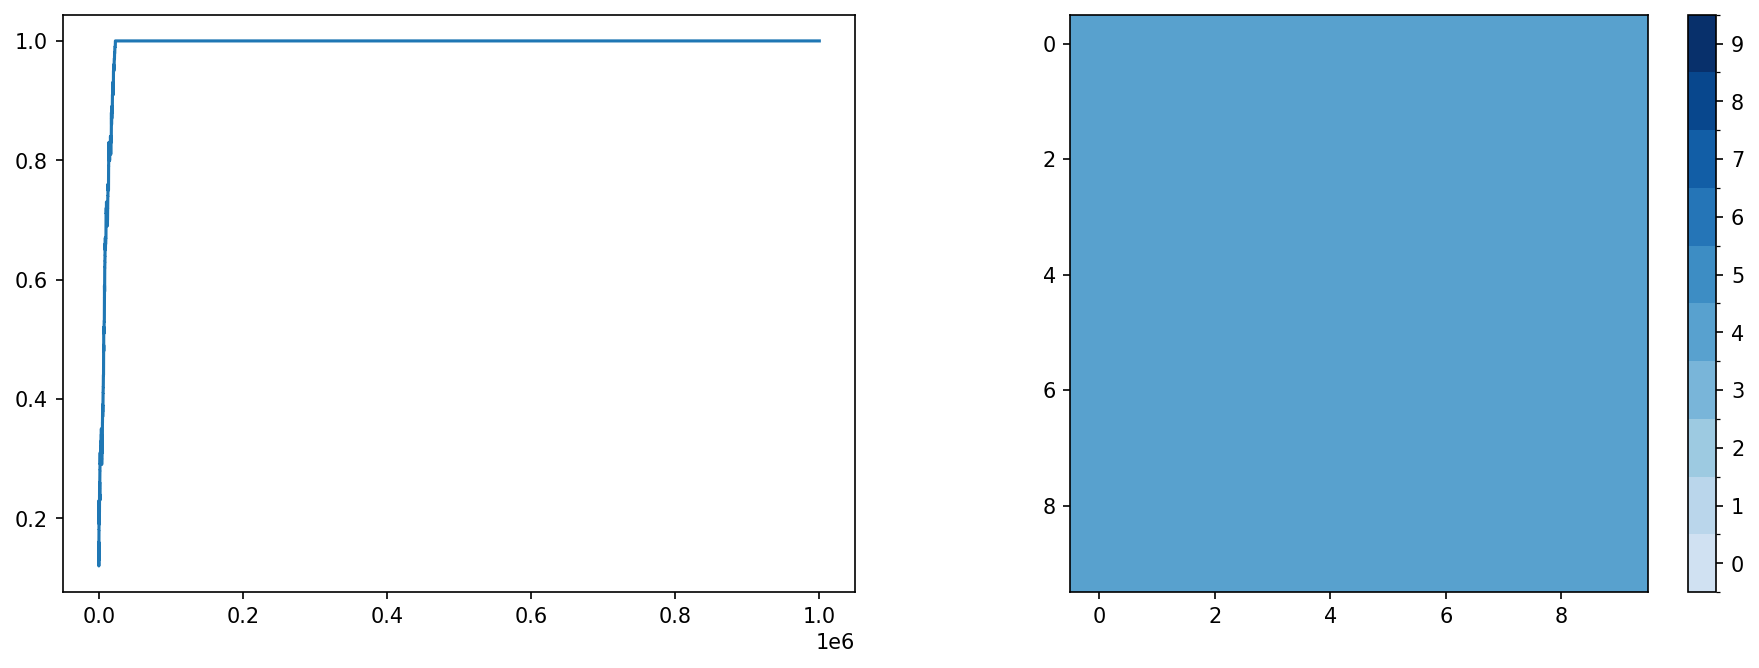

In [15]:
n_list = np.arange(n0, n_it)
mag_cum = np.cumsum(mag_list)/(n_list - n0 + 1)
fig, ax = plt.subplots(1,2, figsize=[15, 5], dpi=150)


ax[0].plot(n_list, mag_list)

cmap = mcolors.ListedColormap(plt.cm.Blues(np.linspace(0.2, 1, q)))
bounds = np.arange(-0.5, q+0.5, 1)
norm = mcolors.BoundaryNorm(bounds, cmap.N)

im = ax[1].imshow(M_save[-1], cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax[1], boundaries=bounds, ticks=np.arange(0, q))

In [11]:
T_list = np.linspace(0.00001, 1, 10)

avg_mag = []
std_mag = []

for t in T_list:
    mag_t = []
    print(f"{t} being checked")
    for _ in range(10):
        mag_list, M_save = potts_model(M, n_it, n0, q, T=t)
        mag_t.append(np.mean(mag_list))
    avg_mag.append(np.mean(mag_t))
    std_mag.append(np.std(mag_t))

1e-05 being checked


/var/folders/jg/zx8gy3fd02qb_nm676xd6p6c0000gn/T/ipykernel_22759/810770557.py:21: RuntimeWarning: overflow encountered in exp
  mh = np.exp(-dE / (kb * T))


0.11112 being checked
0.22223 being checked
0.33334 being checked
0.44445 being checked
0.5555599999999999 being checked
0.66667 being checked
0.7777799999999999 being checked
0.88889 being checked
1.0 being checked


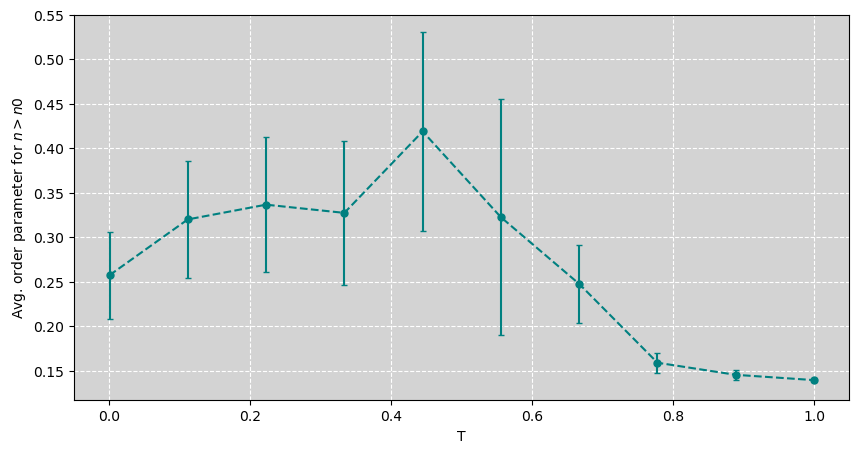

In [ ]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.errorbar(T_list, avg_mag, yerr=std_mag, ls='--', marker='o', markersize=5, color='teal', capsize=2)
ax.set_xlabel("T")
ax.set_ylabel(r"Avg. order parameter for $n > n0$");
ax.set_facecolor("lightgrey")
ax.grid(color="white", ls='--')